In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
df = pd.read_csv('email.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Basic Info about the data

In [3]:
print(f'''
Shape : {df.shape}

Null Values :
{df.isnull().sum()}

Duplicated Values : 
{df.duplicated().sum()}
''')


Shape : (5573, 2)

Null Values :
Category    0
Message     0
dtype: int64

Duplicated Values : 
415



- No null values
- 415 duplicate rows - Need to remove

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
# Unique Values in categories
df['Category'].unique()

array(['ham', 'spam', '{"mode":"full"'], dtype=object)

- Whats this {"mode":"full" ??

In [6]:
df['Category'].value_counts()

Category
ham               4825
spam               747
{"mode":"full"       1
Name: count, dtype: int64

In [7]:
df.loc[df['Category']=='{"mode":"full"']

,Category,Message
5572,"{""mode"":""full""",isActive:false}


In [8]:
df = df.drop(5572)

# Data Preprocessing

In [9]:
# Cleaning duplicated values
df = df.drop_duplicates().reset_index(drop=True)

In [10]:
# label encoding

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Category'] = encoder.fit_transform(df['Category'])
encoder.classes_

array(['ham', 'spam'], dtype=object)

In [11]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# EDA

In [12]:
nltk.download('punkt_tab')

df['characters'] = df['Message'].apply(len)                              # Number of characters
df['words'] = df['Message'].apply(nltk.word_tokenize).apply(len)         # Number of words
df['sentences'] = df['Message'].apply(nltk.sent_tokenize).apply(len)     # Number of Sentences

[nltk_data] Downloading package punkt_tab to /home/ree/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [13]:
df.head()

,Category,Message,characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [14]:
categories = df.groupby('Category')
spam = categories.get_group(1)
ham = categories.get_group(0)

In [15]:
df.describe()

,Category,characters,words,sentences
count,5157.000000,5157.000000,5157.000000,5157.000000
mean,0.124297,79.103936,18.560403,1.969750
std,0.329952,58.382922,13.405970,1.455526
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,118.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


Category
0    4516
1     641
Name: count, dtype: int64


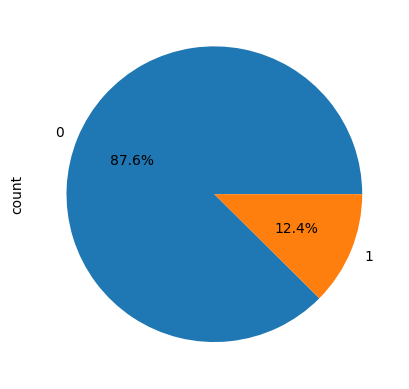

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df['Category'].value_counts())
df['Category'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.show()

### Observations 
- The number of spam messages are only 1/10th of the total data - Imbalanced data
- Possible approaches
    - Handle imbalanced data - Upsampling/ undersampling
    - Without handling ??

In [17]:
pd.set_option('display.max_columns', None)
categories.describe()

characters                                                          \
              count        mean        std  min    25%    50%    75%    max   
Category                                                                      
0            4516.0   70.869353  56.708301  2.0   34.0   53.0   91.0  910.0   
1             641.0  137.118565  30.399707  7.0  130.0  148.0  157.0  223.0   

           words                                                      \
           count       mean        std  min   25%   50%   75%    max   
Category                                                               
0         4516.0  17.267715  13.588065  1.0   8.0  13.0  22.0  220.0   
1          641.0  27.667707   7.103501  2.0  25.0  29.0  32.0   46.0   

         sentences                                                
             count      mean       std  min  25%  50%  75%   max  
Category                                                          
0           4516.0  1.827724  1.394338  1.0  1.0  1.0  2.0  38.0  
1            641.0  2.970359  1.485575  1.0  2.0  3.0  4.0   9.0

### Observations
- Average (mean) length of spam messages are longer than ham messages
- Spam messages are around the length of 130-150 characters, 25-44 words
- Ham messages are around the length of 30-90 characters, 8-22 words
- In general spam messages are longer then ham messages

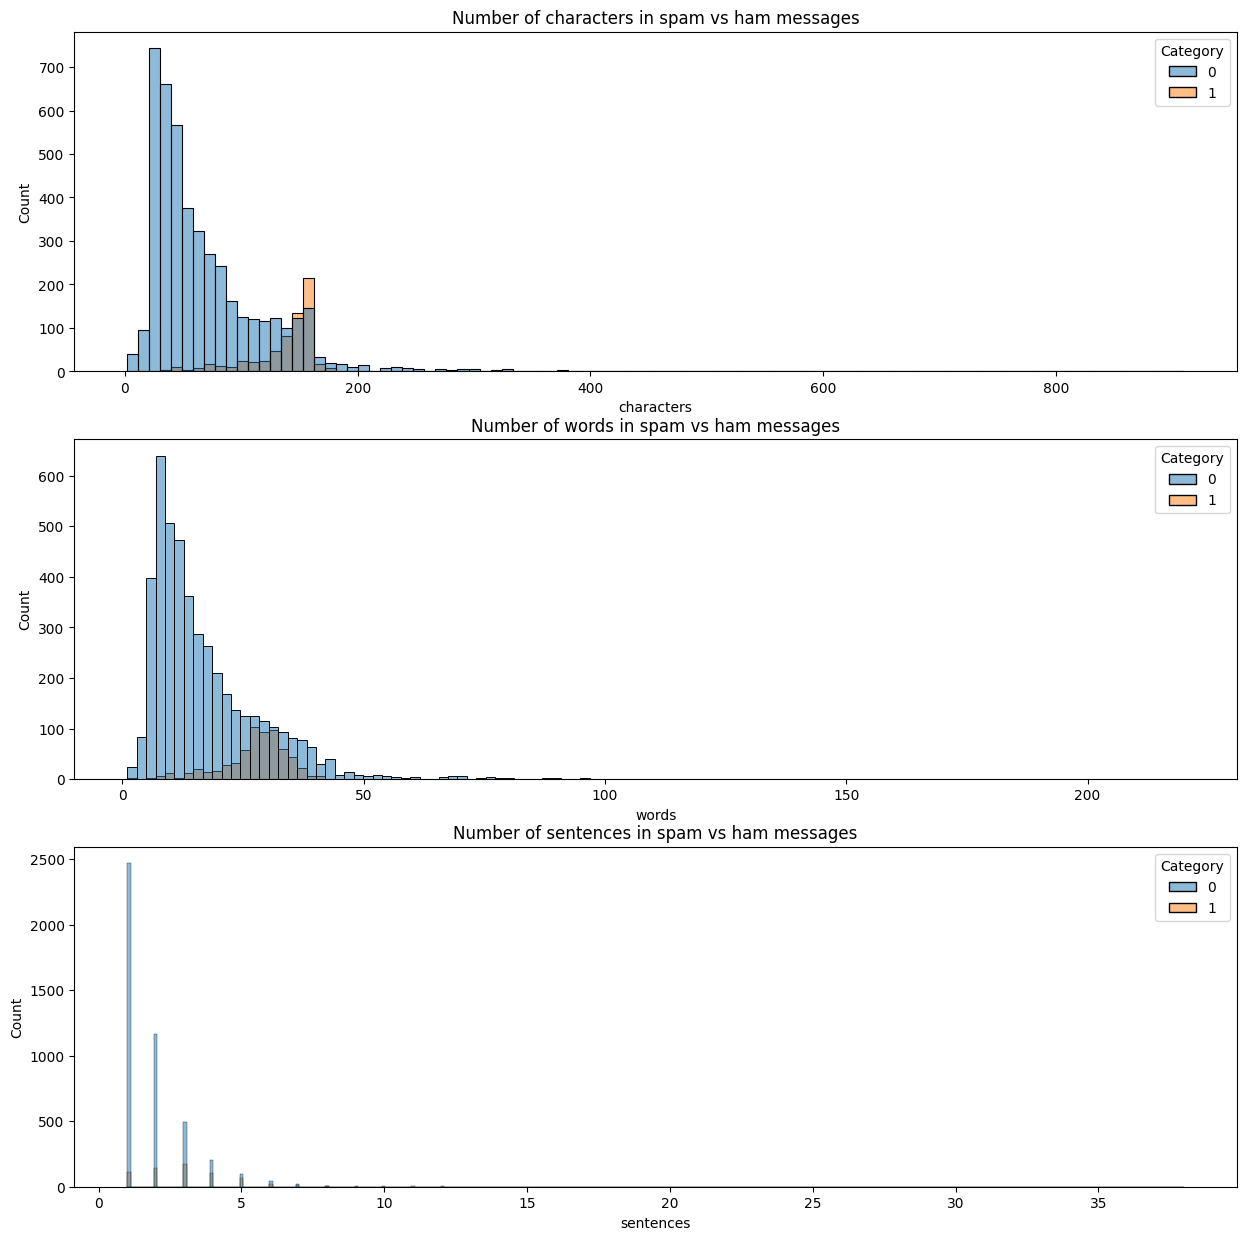

In [18]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,15))
sns.histplot(data=df, x='characters', hue='Category', ax=ax[0])
sns.histplot(data=df, x='words', hue='Category', ax=ax[1])
sns.histplot(data=df, x='sentences', hue='Category', ax=ax[2])
ax[0].set_title('Number of characters in spam vs ham messages')
ax[1].set_title('Number of words in spam vs ham messages')
ax[2].set_title('Number of sentences in spam vs ham messages')

plt.show()

# Text Preprocessing

In [19]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
import re

def preprocess_text(text):
    # convert string to lowercase
    text = text.lower()

    # tokenization - not the same as text.split()
    words = nltk.word_tokenize(text)
    temp = []
    
    # remove stop words and punctuations
    pattern = r'^[a-zA-Z]+$'
    for word in words:
        
        # if word not in stopwords.words('english') and word not in string.punctuation:  
        # Note that this method wont work for tokens like '..' or '...' or ',,,' etc as they are tokenized together so they wont be found in string.punctuation
        # So we use regex to check if the token consists of patterns [a-zA-Z] i.e only letters
        
        if word not in stopwords.words('english') and re.search(pattern, word):
            temp.append(word)

            
    # stemming
    stemmer = PorterStemmer()
    
    # for word in temp:
    #     word = stemmer.stem(word)    
    # This wont work like this cuz it will modify the word variable not the temp (list) 
    
    temp = [stemmer.stem(word) for word in temp]

    processed_text = ' '.join(temp)
    return processed_text

In [20]:
df['message_preprocessed'] = df['Message'].apply(preprocess_text)
df.head()

,Category,Message,characters,words,sentences,message_preprocessed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt may ...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# WordCloud

In [21]:
df['Message'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [22]:
categories = df.groupby('Category')
spam = categories.get_group(1)
ham = categories.get_group(0)

spam_text_string = ''
ham_text_string = ''

# concatenating all the words in processed messages with a ' ' to get a single string for wordcloud
for message in spam['message_preprocessed']:
    spam_text_string = spam_text_string + ' ' + message

for message in ham['message_preprocessed']:
    ham_text_string = ham_text_string + ' ' + message

In [23]:
from wordcloud import WordCloud
spam_cloud = WordCloud(height=400).generate(spam_text_string)
ham_cloud = WordCloud(background_color="white", height=400).generate(ham_text_string)

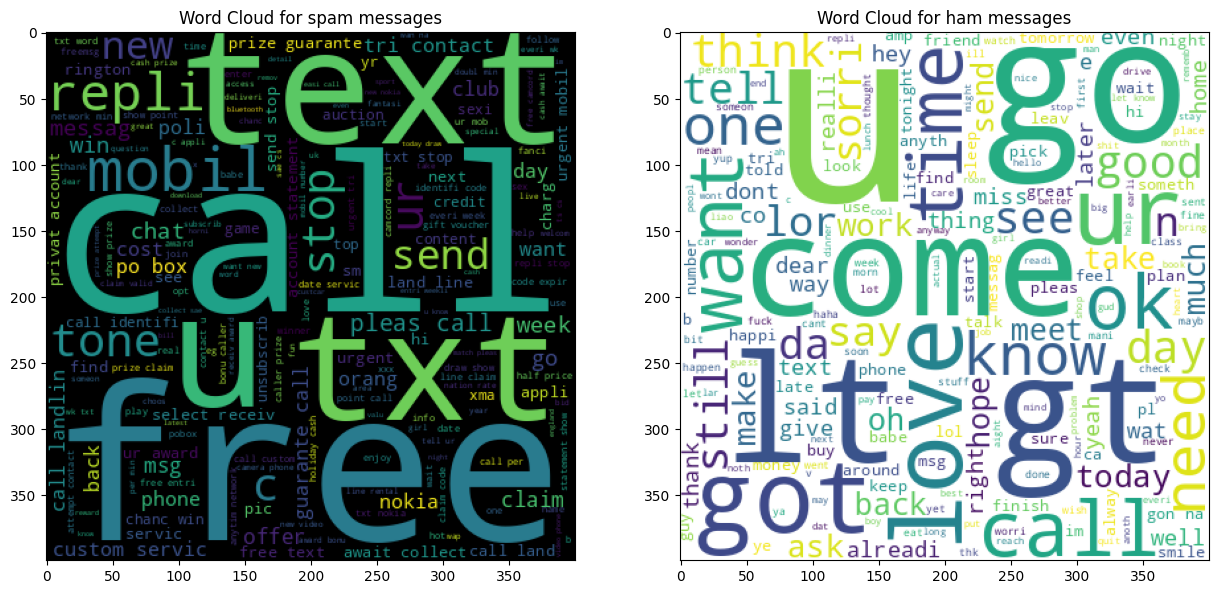

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

ax[0].imshow(spam_cloud)
ax[0].set_title('Word Cloud for spam messages')
ax[1].imshow(ham_cloud)
ax[1].set_title('Word Cloud for ham messages')
plt.show()

# Most frequent words

In [25]:
from collections import defaultdict

In [26]:
# spam 
spam_dict = defaultdict(int)
for word in spam_text_string.split():
    spam_dict[word] += 1

# ham 
ham_dict = defaultdict(int)
for word in ham_text_string.split():
    ham_dict[word] += 1

In [27]:
top_spam_words = sorted(spam_dict.items(), key=(lambda x : x[1]), reverse=True)[:10]
top_ham_words = sorted(ham_dict.items(), key=(lambda x : x[1]), reverse=True)[:10]

spam_df = pd.DataFrame(top_spam_words, columns=['word', 'frequency'])
ham_df = pd.DataFrame(top_ham_words, columns=['word', 'frequency'])
pd.concat((spam_df, ham_df), axis=1, keys=['spam', 'ham'])

spam             ham          
    word frequency  word frequency
0   call       311     u       897
1   free       186    go       407
2    txt       139   get       351
3   text       122    gt       288
4     ur       119    lt       287
5      u       115  come       278
6  mobil       110   got       239
7   stop       108  know       237
8  repli       103  like       236
9  claim        96  call       235

Text(0.5, 1.0, 'Most frequent words in ham texts')

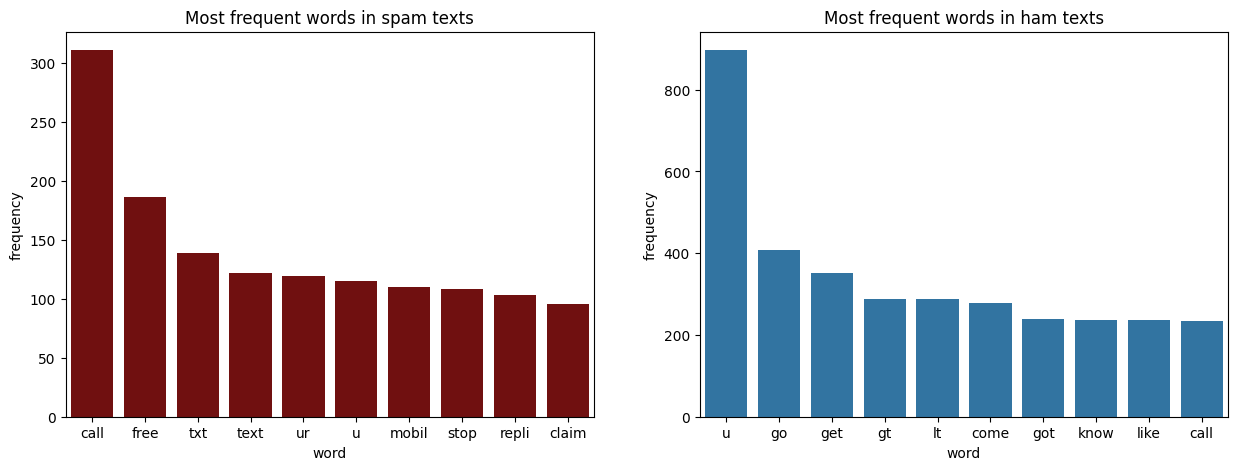

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.barplot(data=spam_df, x='word', y='frequency', ax=ax[0], color='maroon')
ax[0].set_title('Most frequent words in spam texts')
sns.barplot(data=ham_df, x='word', y='frequency', ax=ax[1])
ax[1].set_title('Most frequent words in ham texts')

### Conclusions
- 'u' comes in both spam and ham, will it cause misclassifications? Gotta try
- #### Call = Spam directly as it occurs significantly more than other words ?? Demnn. gotta try it during testing

# Model Building

### Preprocessing for feeding into model

In [29]:
# Vectorization - Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=3000)
vectors = vectorizer.fit_transform(df['message_preprocessed']).toarray()
vectors.shape

(5157, 3000)

In [30]:
# setting up training and testing data
X = vectors
y = df['Category'].values

### Model Selection

#### Trying out which Naive Bayes works best

In [31]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
# Complement Naive Bayes suited for imbalanced datasets according to documentation

gnb = GaussianNB()
mnb = MultinomialNB()
compnb = ComplementNB()
bnb = BernoulliNB()

estimators = [('gnb', gnb), ('mnb', mnb), ('compnb', compnb), ('bnb', bnb)]

In [32]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import cross_val_score

accuracy_scores = defaultdict(float)
precision_scores = defaultdict(float)
for estimator in estimators:
    accuracy_scores[estimator[0]] = cross_val_score(estimator=estimator[1], X=X, y=y, scoring='accuracy', cv=3).mean()
    precision_scores[estimator[0]] = cross_val_score(estimator=estimator[1], X=X, y=y, scoring='precision', cv=3).mean()

In [33]:
accuracy_scores = pd.Series(accuracy_scores)
precision_scores = pd.Series(precision_scores)

metrics = pd.DataFrame([accuracy_scores, precision_scores]).T
metrics.columns = ['Accuracy', 'Precision']
metrics

,Accuracy,Precision
gnb,0.869886,0.486507
mnb,0.970913,0.864169
compnb,0.923405,0.628808
bnb,0.973628,0.960040


#### Bernoulli NB performs best - High accuracy + High precision

### Trying out other models

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, StackingClassifier



ImportError: cannot import name 'RandomForestClassifier' from 'sklearn.tree' (/home/ree/python_venv/ML/lib64/python3.12/site-packages/sklearn/tree/__init__.py)

# Exporting required files

In [34]:
text_preprocessor = preprocess_text
trained_vectorizer = vectorizer
trained_model = BernoulliNB().fit(X, y)

In [35]:
text = text_preprocessor('hello safsa')
vector = trained_vectorizer.transform([text])
trained_model.predict(vector)

array([0])

In [36]:
import pickle
pickle.dump(trained_model, open('estimator', 'wb'))
pickle.dump(trained_vectorizer, open('vectorizer', 'wb'))
pickle.dump(text_preprocessor, open('text_preprocessor', 'wb'))

# Creating a Pipeline (trying 🥲)
- This one is only for prediction and not for training or any other purposes these functionalities are not added. The fit methods will break
- Can take only one input string
- We are using a pre trained model and a pre trained Count vectorizer to transform and predict the output

In [37]:
from sklearn.pipeline import Pipeline

class TextPreprocessor:
    
    def __init__(self):
        self.stemmer = PorterStemmer()
        

    def fit(self, X, y=None):
        return self    # no processing is done during fit

    def transform(self, X, y=None):   
        # X = X[0]    # since we need to pass an list of items for pipeline  
        X = X.lower()
        
        words = nltk.word_tokenize(X)
        temp = []
        
        pattern = r'^[a-zA-Z]+$'
        for word in words:
            if word not in stopwords.words('english') and re.search(pattern, word):
                temp.append(word)

        temp = [self.stemmer.stem(word) for word in temp]
    
        processed_text = ' '.join(temp)
                  
        return processed_text


# Trained model and vectorizer
trained_model = BernoulliNB().fit(X, y)
trained_vectorizer = CountVectorizer(max_features=3000).fit(df['message_preprocessed'])

pipe = Pipeline(steps=[
    ('text_preprocessor', TextPreprocessor()),
    ('pre_trained_vectorizer', trained_vectorizer),
    ('pre_trained_estimator (BernoulliNB)', trained_model)
])

In [38]:
tp = TextPreprocessor()
text = tp.transform(['free entri wkli comp win fa cup final tkt may text fa receiv entri question std txt rate c appli'])
text

AttributeError: 'list' object has no attribute 'lower'

In [ ]:
vector = trained_vectorizer.transform([text])
vector.toarray()

In [ ]:
trained_model.predict(vector)

In [ ]:
tp = TextPreprocessor()
text = tp.transform(['free entri wkli comp win fa cup final tkt may text fa receiv entri question std txt rate c appli'])
vector = trained_vectorizer.transform([text])
trained_model.predict(vector)

In [ ]:
# using pipe
pipe.predict(['free entri wkli comp win fa cup final tkt may text fa receiv entri question std txt rate c appli'])